In [3]:
import findspark
findspark.init()
import pyspark # only run after findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()
import pandas as pd
sc = spark.sparkContext
import json 
from sodapy import Socrata

In [4]:
client = Socrata("data.buffalony.gov", None)
results = client.get("d6g9-xbgu", limit=1000000)

In [6]:
df1=pd.DataFrame.from_records(results)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 274403 entries, 0 to 274402
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype 
---  ------                       --------------   ----- 
 0   case_number                  274403 non-null  object
 1   incident_datetime            274398 non-null  object
 2   incident_type_primary        274403 non-null  object
 3   incident_description         274403 non-null  object
 4   address_1                    274365 non-null  object
 5   city                         274403 non-null  object
 6   state                        274403 non-null  object
 7   zip                          43620 non-null   object
 8   latitude                     273482 non-null  object
 9   longitude                    273482 non-null  object
 10  created_at                   274403 non-null  object
 11  location                     272016 non-null  object
 12  hour_of_day                  274403 non-null  object
 13  day_of_week   

In [50]:
df1.columns
df2=df1[['incident_datetime', 
        'address_1', 'city', 'state', 'latitude',
       'longitude', 'hour_of_day', 'day_of_week',
       'parent_incident_type']]
df2.head()

,incident_datetime,address_1,city,state,latitude,longitude,hour_of_day,day_of_week,parent_incident_type
0,2020-08-27T12:00:00.000,100 Block GRACE ST,Buffalo,NY,42.944,-78.9,1,FRIDAY,Theft of Vehicle
1,2020-08-28T01:21:00.000,300 Block CORNWALL AV,Buffalo,NY,42.924,-78.822,1,FRIDAY,Assault
2,2020-08-28T02:45:00.000,PLYMOUTH AV & HAMPSHIRE ST,Buffalo,NY,42.911,-78.877,2,FRIDAY,Assault
3,2020-08-28T03:30:00.000,300 Block SHIRLEY AV,Buffalo,NY,42.944,-78.811,5,FRIDAY,Breaking & Entering
4,2020-08-28T01:30:00.000,300 Block HAMPSHIRE ST,Buffalo,NY,42.914,-78.891,5,FRIDAY,Theft


In [13]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 274403 entries, 0 to 274402
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   incident_datetime     274398 non-null  object
 1   address_1             274365 non-null  object
 2   city                  274403 non-null  object
 3   state                 274403 non-null  object
 4   zip                   43620 non-null   object
 5   latitude              273482 non-null  object
 6   longitude             273482 non-null  object
 7   location              272016 non-null  object
 8   hour_of_day           274403 non-null  object
 9   day_of_week           274403 non-null  object
 10  parent_incident_type  274403 non-null  object
dtypes: object(11)
memory usage: 23.0+ MB


In [9]:
df2.parent_incident_type.unique()


array(['Theft of Vehicle', 'Assault', 'Breaking & Entering', 'Theft',
       'Robbery', 'Sexual Offense', 'Homicide', 'Sexual Assault',
       'Other Sexual Offense'], dtype=object)

In [51]:
df2=pd.DataFrame(df2)

In [60]:
df2.incident_datetime=pd.to_datetime(df2.incident_datetime)

In [52]:
df2.day_of_week.unique()

array(['FRIDAY', 'SATURDAY', 'SUNDAY', 'WEDNESDAY', 'THURSDAY', 'MONDAY',
       'TUESDAY', 'Tuesday', 'Monday', 'Saturday', 'Thursday', 'Friday',
       'Wednesday', 'Sunday', 'null'], dtype=object)

In [53]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 274403 entries, 0 to 274402
Data columns (total 9 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   incident_datetime     274398 non-null  object
 1   address_1             274365 non-null  object
 2   city                  274403 non-null  object
 3   state                 274403 non-null  object
 4   latitude              273482 non-null  object
 5   longitude             273482 non-null  object
 6   hour_of_day           274403 non-null  object
 7   day_of_week           274403 non-null  object
 8   parent_incident_type  274403 non-null  object
dtypes: object(9)
memory usage: 18.8+ MB


In [54]:
df2.day_of_week.unique()

array(['FRIDAY', 'SATURDAY', 'SUNDAY', 'WEDNESDAY', 'THURSDAY', 'MONDAY',
       'TUESDAY', 'Tuesday', 'Monday', 'Saturday', 'Thursday', 'Friday',
       'Wednesday', 'Sunday', 'null'], dtype=object)

In [55]:
df2.day_of_week=df2.day_of_week.str.replace('SATURDAY','Saturday')
df2.day_of_week=df2.day_of_week.str.replace('FRIDAY','Friday')
df2.day_of_week=df2.day_of_week.str.replace('SUNDAY', 'Sunday')
df2.day_of_week=df2.day_of_week.str.replace('MONDAY','Monday')
df2.day_of_week=df2.day_of_week.str.replace('TUESDAY','Tuesday')
df2.day_of_week=df2.day_of_week.str.replace('WEDNESDAY','Wednesday')
df2.day_of_week=df2.day_of_week.str.replace('THURSDAY','Thursday')

In [56]:
df2.day_of_week.unique()

array(['Friday', 'Saturday', 'Sunday', 'Wednesday', 'Thursday', 'Monday',
       'Tuesday', 'null'], dtype=object)

In [57]:
spark.conf.set("spark.sql.execution.arrow.enabled", "true")

In [58]:
df2.incident_datetime.isna().value_counts()

False    274398
True          5
Name: incident_datetime, dtype: int64

In [61]:
df2.city.isna().value_counts()

False    274403
Name: city, dtype: int64

In [63]:
df2.longitude.isna().value_counts()

False    273482
True        921
Name: longitude, dtype: int64

In [65]:
df2.latitude.isna().value_counts()

False    273482
True        921
Name: latitude, dtype: int64

In [66]:
df2.day_of_week.isna().value_counts()

False    274403
Name: day_of_week, dtype: int64

In [68]:
filt=df2.longitude.isna()
filt

0         False
1         False
2         False
3         False
4         False
          ...  
274398    False
274399    False
274400    False
274401    False
274402    False
Name: longitude, Length: 274403, dtype: bool

In [69]:
dff=df2[filt==False]

In [70]:
dff

,incident_datetime,address_1,city,state,latitude,longitude,hour_of_day,day_of_week,parent_incident_type
0,2020-08-27 12:00:00,100 Block GRACE ST,Buffalo,NY,42.944,-78.9,1,Friday,Theft of Vehicle
1,2020-08-28 01:21:00,300 Block CORNWALL AV,Buffalo,NY,42.924,-78.822,1,Friday,Assault
2,2020-08-28 02:45:00,PLYMOUTH AV & HAMPSHIRE ST,Buffalo,NY,42.911,-78.877,2,Friday,Assault
3,2020-08-28 03:30:00,300 Block SHIRLEY AV,Buffalo,NY,42.944,-78.811,5,Friday,Breaking & Entering
4,2020-08-28 01:30:00,300 Block HAMPSHIRE ST,Buffalo,NY,42.914,-78.891,5,Friday,Theft
...,...,...,...,...,...,...,...,...,...
274398,2020-08-23 23:00:00,400 Block E UTICA ST,Buffalo,NY,42.911,-78.849,23,Sunday,Assault
274399,2021-08-09 03:43:22,0 Block PARK ST,Buffalo,NY,42.898,-78.876,4,Monday,Breaking & Entering
274400,2020-09-03 15:00:52,BROADWAY & PERSONS,Buffalo,NY,42.897,-78.82,17,Thursday,Assault
274401,2020-09-17 16:29:31,200 Block 7TH ST,Buffalo,NY,42.891,-78.885,16,Thursday,Robbery


In [71]:
dff.isna().value_counts()

incident_datetime  address_1  city   state  latitude  longitude  hour_of_day  day_of_week  parent_incident_type
False              False      False  False  False     False      False        False        False                   273439
                   True       False  False  False     False      False        False        False                       38
True               False      False  False  False     False      False        False        False                        5
dtype: int64

In [73]:
filt=dff.address_1.isna()
dff=dff[filt==False]

In [76]:
dff.isna().value_counts()

incident_datetime  address_1  city   state  latitude  longitude  hour_of_day  day_of_week  parent_incident_type
False              False      False  False  False     False      False        False        False                   273439
True               False      False  False  False     False      False        False        False                        5
dtype: int64

In [77]:
filt=dff.incident_datetime.isna()
dff=dff[filt==False]

In [78]:
dff.isna().value_counts()

incident_datetime  address_1  city   state  latitude  longitude  hour_of_day  day_of_week  parent_incident_type
False              False      False  False  False     False      False        False        False                   273439
dtype: int64

In [84]:

dff.to_csv('wrangled.csv')

# EDA

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Text(0.5, 1.0, 'day of week crime distribution')

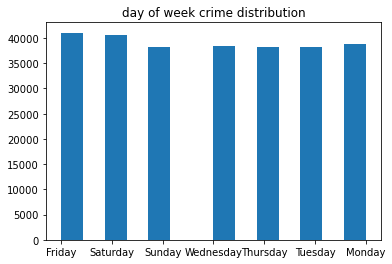

In [91]:
plt.hist(dff.day_of_week,bins=14)
plt.title('day of week crime distribution')

no significance! 

(array([32624.,     0.,  9731.,     0.,  8695.,     0.,  7488.,     0.,
         5970.,     0.,  4609.,     0.,  4910.,     0.,  6219.,     0.,
         9361.,     0., 10143.,     0., 10544.,     0., 11174.,     0.,
            0., 15841.,     0., 10833.,     0., 11171.,     0., 12283.,
            0., 13261.,     0., 13209.,     0., 12730.,     0., 11497.,
            0., 12945.,     0., 12832.,     0., 12814.,     0., 12555.]),
 array([ 0.        ,  0.47916667,  0.95833333,  1.4375    ,  1.91666667,
         2.39583333,  2.875     ,  3.35416667,  3.83333333,  4.3125    ,
         4.79166667,  5.27083333,  5.75      ,  6.22916667,  6.70833333,
         7.1875    ,  7.66666667,  8.14583333,  8.625     ,  9.10416667,
         9.58333333, 10.0625    , 10.54166667, 11.02083333, 11.5       ,
        11.97916667, 12.45833333, 12.9375    , 13.41666667, 13.89583333,
        14.375     , 14.85416667, 15.33333333, 15.8125    , 16.29166667,
        16.77083333, 17.25      , 17.72916667, 18.20833

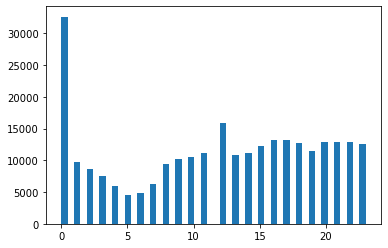

In [96]:
plt.hist(dff.hour_of_day.astype('int'),bins=48)

a few focal points arise from the data: 
    -it appears that 0:00 am is the hour with crime perday 
    -5-6:00 am is where crime is at lowest through the day.
    

In [97]:
dff.parent_incident_type.unique()

array(['Theft of Vehicle', 'Assault', 'Breaking & Entering', 'Theft',
       'Robbery', 'Sexual Offense', 'Homicide', 'Sexual Assault',
       'Other Sexual Offense'], dtype=object)

In [106]:
theft=dff[dff.parent_incident_type=='Theft of Vehicle']
theft.head()

,incident_datetime,address_1,city,state,latitude,longitude,hour_of_day,day_of_week,parent_incident_type
0,2020-08-27 12:00:00,100 Block GRACE ST,Buffalo,NY,42.944,-78.9,1,Friday,Theft of Vehicle
5,2020-08-28 00:00:00,500 Block WEST AV,Buffalo,NY,42.906,-78.892,6,Friday,Theft of Vehicle
6,2020-08-28 03:00:00,0 Block BAYNES ST,Buffalo,NY,42.917,-78.885,7,Friday,Theft of Vehicle
8,2020-08-28 03:15:00,0 Block 16TH ST,Buffalo,NY,42.907,-78.884,10,Friday,Theft of Vehicle
15,2020-08-28 14:17:57,100 Block HEDLEY PL,Buffalo,NY,42.923,-78.847,14,Friday,Theft of Vehicle


Text(0.5, 1.0, 'theft of vehicle by hour')

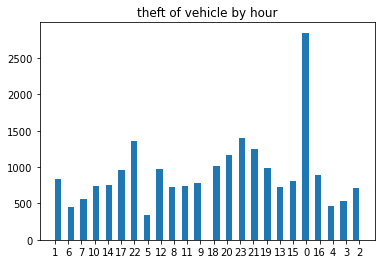

In [110]:
plt.hist(theft.hour_of_day,bins=48)
plt.title('theft of vehicle by hour')

12:00 am is the hour with the most vehichle theft 

Text(0.5, 1.0, 'Theft of vehicle by day')

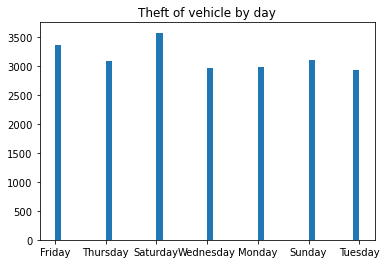

In [111]:
plt.hist(theft.day_of_week,bins=48)
plt.title('Theft of vehicle by day')

no daily significance 

Text(0.5, 1.0, 'Assault by hour')

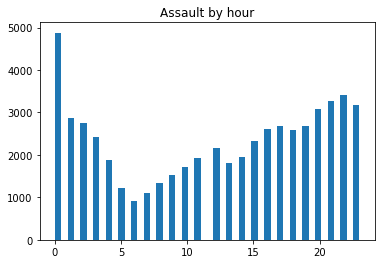

In [124]:
assult=dff[dff.parent_incident_type=='Assault']
plt.hist(assult.hour_of_day.astype('int'),bins=48)
plt.title('Assault by hour')

0:00 am is the hour with most assaults, assault seems to be operating on a cycle where 6:00 am is the lowest crimes commited time, then an increase by hour takes place up until the peak at 0:00 am, then a reduction to the lowest at 6:00 am?

Text(0.5, 1.0, 'Assault by day')

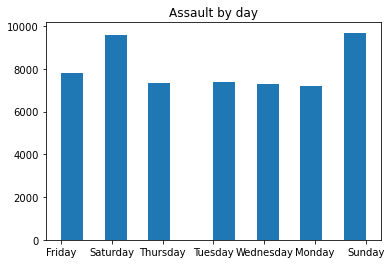

In [114]:
plt.hist(assult.day_of_week,bins=14)
plt.title('Assault by day')

Saturday and Sunday carry more assaults than other days of the week  

In [116]:
dff.parent_incident_type.unique()

array(['Theft of Vehicle', 'Assault', 'Breaking & Entering', 'Theft',
       'Robbery', 'Sexual Offense', 'Homicide', 'Sexual Assault',
       'Other Sexual Offense'], dtype=object)

Text(0.5, 1.0, 'Breaking & Entering by Hour')

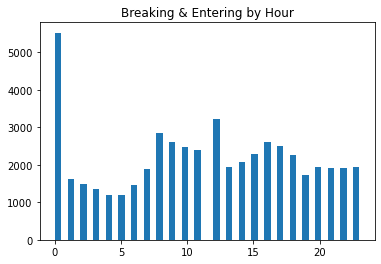

In [120]:
be=dff[dff.parent_incident_type=='Breaking & Entering']
plt.hist(be.hour_of_day.astype('int'),bins=48)
plt.title('Breaking & Entering by Hour')

again it appears that 0:00 am is the hour with most Breaking and entring

Text(0.5, 1.0, 'Breaking & Entering by Day')

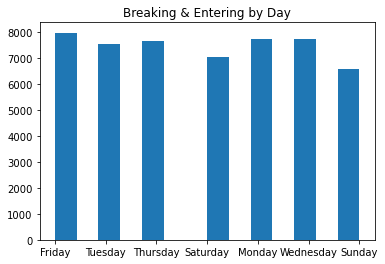

In [118]:
plt.hist(be.day_of_week,bins=14)
plt.title('Breaking & Entering by Day')

No daily significance

Text(0.5, 1.0, 'Robbery per Hour')

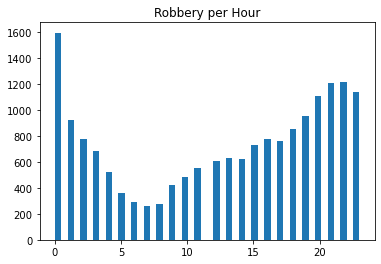

In [123]:
rob=dff[dff.parent_incident_type=='Robbery']
plt.hist(rob.hour_of_day.astype('int'),bins=48)
plt.title('Robbery per Hour')

0:00 am is the hour with most robberies, robberies seems to be operating on a cycle where 6:00 am is the lowest crimes commited time, then an increase by hour takes place up until the peak at 0:00 am, then a reduction to the lowest at 6:00 am

Text(0.5, 1.0, 'Robbery per Day')

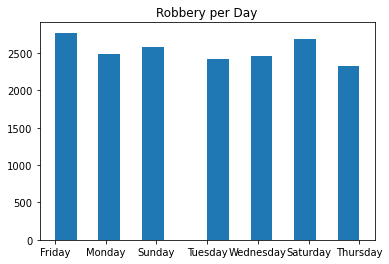

In [125]:
plt.hist(rob.day_of_week,bins=14)
plt.title('Robbery per Day')

In [126]:
# no significance 

Text(0.5, 1.0, 'Sexual Offense per Hour')

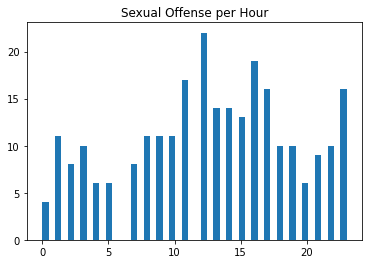

In [127]:
sex1=dff[dff.parent_incident_type=='Sexual Offense']
plt.hist(sex1.hour_of_day.astype('int'),bins=48)
plt.title('Sexual Offense per Hour')

unlike all other types of crime , sexual offense peaks at 10:00 am to 6:00pm 

Text(0.5, 1.0, 'Sexual Offense by Day')

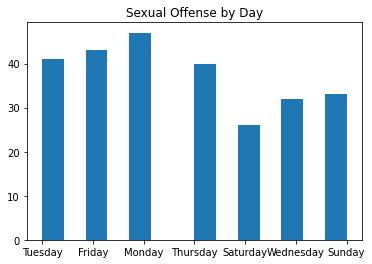

In [129]:
plt.hist(sex1.day_of_week,bins=14)
plt.title('Sexual Offense by Day')

Higher levels during the week than weekends 

Text(0.5, 1.0, 'Sexual Assault by Hour')

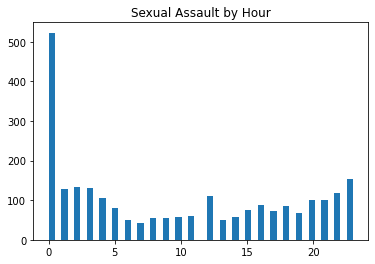

In [131]:
sex2=dff[dff.parent_incident_type=='Sexual Assault']
plt.hist(sex2.hour_of_day.astype('int'),bins=48)
plt.title('Sexual Assault by Hour')

sexual assault seems to be lower during the day higher during night time

Text(0.5, 1.0, 'Sexual Assault by Day')

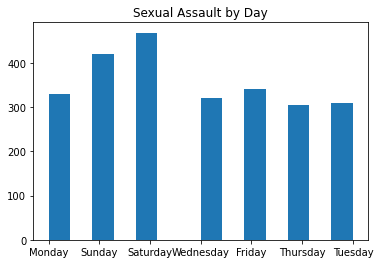

In [132]:
plt.hist(sex2.day_of_week,bins=14)
plt.title('Sexual Assault by Day')

Marginally higher over the weekend but holds a steady base

Text(0.5, 1.0, 'Homocide by Hour')

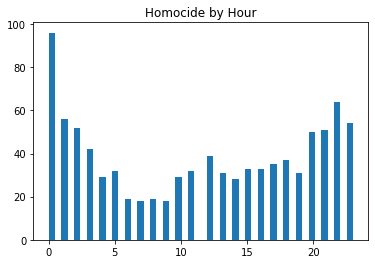

In [134]:
hom=dff[dff.parent_incident_type=='Homicide']
plt.hist(hom.hour_of_day.astype('int'),bins=48)
plt.title('Homocide by Hour')

Text(0.5, 1.0, 'Homicide by Day')

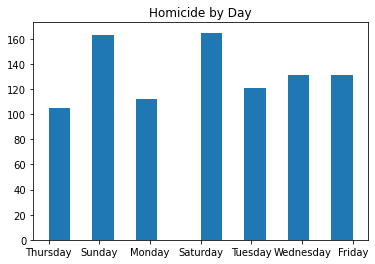

In [135]:
plt.hist(hom.day_of_week,bins=14)
plt.title('Homicide by Day')

In [138]:
dff.parent_incident_type.value_counts()

Theft                   119033
Assault                  56338
Breaking & Entering      52393
Theft of Vehicle         22005
Robbery                  17742
Sexual Assault            2497
Other Sexual Offense      2241
Homicide                   928
Sexual Offense             262
Name: parent_incident_type, dtype: int64

In [139]:
dff.columns

Index(['incident_datetime', 'address_1', 'city', 'state', 'latitude',
       'longitude', 'hour_of_day', 'day_of_week', 'parent_incident_type'],
      dtype='object')

In [ ]:
sns.scatterplot(x='latitude',y= 'longitude',data=dff)

In [ ]:
plt.show()